In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("miles.csv")
print(df.shape)
df.describe()

(730, 3)


,miles
count,730.000000
mean,27.627397
std,15.437588
min,0.000000
25%,21.000000
50%,28.000000
75%,35.000000
max,148.000000


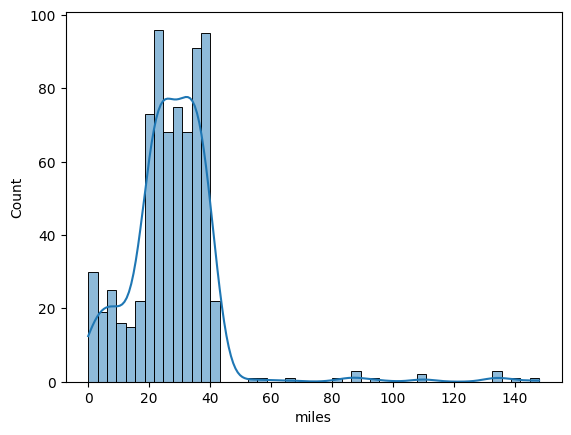

In [7]:
sns.histplot(df["miles"], kde=True)
plt.show()

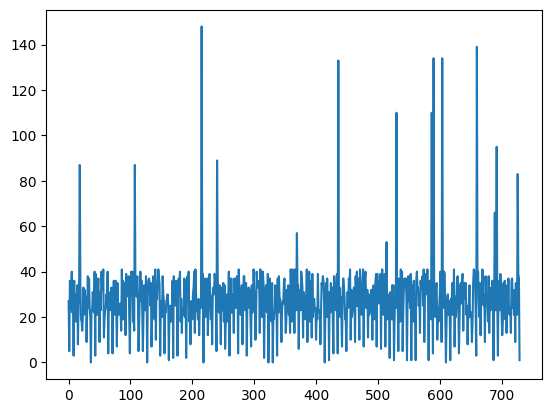

In [6]:
plt.plot(df["miles"])
plt.show()

In [13]:
mean_population = df["miles"].mean()
std_population = df["miles"].std()

mean_population, std_population

(27.627397260273973, 15.437588497596291)

In [9]:
SAMPLE_SIZE = 50

df_sample = df.sample(SAMPLE_SIZE, random_state=100)
df_sample.head()

,date,is_weekend,miles
184,2022-07-04,False,24
535,2023-06-20,False,36
299,2022-10-27,False,41
221,2022-08-10,False,20
152,2022-06-02,False,38


In [14]:
sample_mean = df_sample["miles"].mean()
sample_std = df_sample["miles"].std()
print(f"mean: {sample_mean}, std: {sample_std}")

mean: 25.82, std: 8.805587280070466


In [26]:
import scipy.stats as st

z_score_95_confidence = st.norm.ppf(0.975)
print(z_score_95_confidence)

z_score_99_confidence = st.norm.ppf(0.995)
z_score_99_confidence

1.959963984540054


2.5758293035489004

In [27]:
margin_of_error = z_score_95_confidence * (std_population / np.sqrt(SAMPLE_SIZE))
print(95, margin_of_error)

margin_of_error_99 = z_score_99_confidence * (std_population / np.sqrt(SAMPLE_SIZE))
print(99, margin_of_error_99)

95 4.279002587511059
99 5.623562647993804


In [28]:
upper_bound_95 = sample_mean + margin_of_error
lower_bound_95 = sample_mean - margin_of_error
lower_bound_95, upper_bound_95

(21.54099741248894, 30.09900258751106)

In [29]:
upper_bound_99, lower_bound_99 = sample_mean + margin_of_error_99, sample_mean - margin_of_error_99
lower_bound_99, upper_bound_99

(20.196437352006196, 31.443562647993804)